## Final Project Submission

Please fill out:
* Student names: CALVIN OMWEGA,COLLINS BIWOTT,INGAVI KILAVUKA,MERCY KIRAGU
                 
* Student pace: Full time-Hybrid
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL: 


## BUSINESS UNDERSTANDING

### BUSINESS OVERVIEW

A real estate agency aims to provide detailed pricing models to their clients showing how different features impact home sale prices.By understanding these impacts,the agency can advise sellers on how to enhance their property to maximize sale price and assist buyers in evaluating potential homes

#### CHALLENGES:

1.The King County real estate market is subject to fluctuations influenced by economic conditions, interest rates, and other external factors, posing challenges in predicting property values accurately.

2.The presence of numerous real estate agencies and agents vying for clients' attention intensifies competition, requiring innovative strategies to stand out and attract business.

3.Ensuring the accuracy and completeness of data sources, as well as accessing relevant datasets for analysis, presents challenges in developing robust pricing models and predictive analytics.

4.Ongoing regulatory changes, such as zoning regulations, tax policies, and housing laws, can impact market dynamics and require adaptation to ensure compliance and mitigate risks.

#### PROPOSED SOLUTION:

1.Implement sophisticated data analytics techniques, including machine learning algorithms, to analyze historical sales data, identify trends, and predict future property values with greater accuracy.

2.Develop customized pricing models that consider a wide range of factors, including property features, neighborhood characteristics, market demand, and buyer preferences, to provide tailored pricing recommendations for each property.

3.Establish a framework for continuous monitoring of market trends and model performance, allowing for timely adjustments to pricing strategies and recommendations based on changing market conditions.

4.Foster collaborations with data providers, industry experts, and technology partners to access additional data sources, enhance analytical capabilities, and stay abreast of best practices in real estate valuation and predictive modeling.

In conclusion, by leveraging advanced analytics and innovative strategies, the real estate agency can overcome challenges in the dynamic King County market and provide clients with valuable insights and recommendations to optimize their real estate transactions. Through continuous adaptation, collaboration, and a client-centric approach, the agency can achieve sustainable growth, enhance competitiveness, and deliver exceptional value to clients in the ever-evolving real estate landscape.

### PROBLEM STATEMENT



The real estate agency seeks to develop sophisticated pricing models that analyze the King County housing market data to determine how different features influence home sale prices. By understanding these impacts, the agency aims to:
1. Assist sellers in optimizing their property to maximize sale price: Sellers will benefit from tailored recommendations on which features to enhance or highlight to increase the value of their homes. By leveraging insights from the pricing models, sellers can make informed decisions about renovations, upgrades, or staging strategies to attract potential buyers and achieve optimal sale prices.
2. Empower buyers to make informed purchasing decisions: Buyers will gain valuable insights into how various property features correlate with sale prices. Armed with this knowledge, buyers can prioritize their preferences and make informed decisions when evaluating potential homes. Additionally, the agency can provide guidance on negotiating strategies based on the perceived value of different features.
3. Enhance the agency's competitive advantage: By offering advanced pricing models that provide granular insights into the factors influencing home sale prices, the agency can differentiate itself in the market. This will attract both sellers seeking to maximize their returns and buyers seeking expert guidance in their property search process.

Overall, the development of detailed pricing models will enable the real estate agency to provide superior value to its clients, facilitate more informed decision-making processes, and maintain a competitive edge in the dynamic King County housing market.

## DATA UNDERSTANDING

The King County House sale dataset contains information regarding houses sold during the one year period ranging from May 2014 to May 2015.

In order to understand what each column in our data frame represents, a data dictionary is displayed below:

##### TARGET/DEPENDENT VARIABLE:

price — price of each home sold

##### PREDICTORS/INDEPENDENT VARIABLES:

id — unique identifier for a house

date — date of the home sale

bedrooms — number of bedrooms

bathrooms — number of bathrooms

sqft_living — square footage of the house’s interior living space

sqft_lot — square footage of the land space

floors — number of floors

waterfront — does the house have a view to the waterfront?

view — an index from 0 to 4 of how good the view of the property was

condition — an index from 1 to 5 on the condition of the house
grade — an index from 1 to 13, where 1–3 falls short of building construction and design, 7 has an average level of construction and design, and 11–13 have a high quality level of construction and design

sqft_above — square feet above ground

sqft_basement — square feet below ground

yr_built— the year the house was initially built

yr_renovated — the year of the house’s last renovation (0 if never renovated)

zipcode — zip

lat — latitude coordinate

long — longitude coordinate

sqft_living15 — average size of interior housing living space for the closest 15 houses, in square feet

sqft_lot15 — average size of land lot for the closest 15 houses, in square feet



### DATA PREPROCESSING

This dataset contains information on house sales in King County, WA between May 2014 and May 2015 and is found in this project's repository. The data cleaning on this dataset will be extremely helpful when creating a regression model for predicting house prices

#### IMPORTING NECESSARY LIBRARIES

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


##### LOADING THE DATA

In [43]:


dataset = pd.read_csv("data/kc_house_data.csv",index_col = 0 )



In [44]:
#checking the first five rows
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

The columns in the dataset are integers,floats and objects representing categorical variables.Some columns contain missing values

In [47]:
#Reading the column_names.md Dataset

with open('data/column_names.md', 'r') as file:
    md_lines = file.readlines()

dataset_col = pd.DataFrame({'Text': md_lines})

dataset_col

,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n
5,* `bathrooms` - Number of bathrooms\n
6,* `sqft_living` - Square footage of living spa...
7,* `sqft_lot` - Square footage of the lot\n
8,* `floors` - Number of floors (levels) in house\n
9,* `waterfront` - Whether the house is on a wat...


In [48]:
dataset.shape

(21597, 20)

The data has 21597 entries and 20 columns.

In [49]:
#checking the columns in the dataset
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [50]:
#CHECKING THE DATATYPES OF THE FEATURES ABOVE
column_data_types_counts = dataset.dtypes.value_counts()

print(column_data_types_counts)


int64      8
object     6
float64    6
dtype: int64


#### DATA CLEANING

Data Cleaning is the First Step Towards Predictive Accuracy,In order to produce a trustworthy and accurate model,we will perform data cleaning beforehand!

##### CHECKING FOR MISSING VALUES

Missing values are often times problematic and should always be checked when reviewing a dataset:

In [51]:
# checking if there are any missing values in the features
dataset.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [52]:
#checking for the percentage of missing values per column
dataset.isnull().sum() / len(dataset) * 100


date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

Waterfront, view, and yr_renovated have missing values. If we decide to use these variables in the predictive model it will be problematic hence we'll fix the missing values

#### FIXING MISSING VALUES

As mentioned above, waterfront, view, and yr_renovated are the only columns with missing values.We'll fix the missing values

In [53]:
#checking the percentage
for col in ["waterfront", "view", "yr_renovated"]:
    print(col)
    print(dataset[col].value_counts(normalize = True).sort_values(ascending = False).head())
    print("------------------")

waterfront
NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64
------------------
view
NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64
------------------
yr_renovated
0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64
------------------


The results shown above clearly show that 0 is the most common value for all three columns!,where NONE in the views column is equivalent to 0.In order to retain as much data as possible, we’ll fill the missing values of each column by randomly choosing a unique value given the appropriate weights. For example, a missing value in the waterfront column will be replaced by 0 with a 99% chance and 1 with a 1% chance:

In [54]:


def replace_missing(val, probs):
    if pd.isnull(val):
        return np.random.choice(probs.index, p=probs)
    else:
        return val

for col in ["waterfront", "view", "yr_renovated"]:
    # Check if there are missing values in the column
    if dataset[col].isnull().sum() > 0:
        # Calculate the probabilities of each unique value
        unique_p = dataset[col].value_counts(normalize=True)
        # Apply the function to replace missing values
        dataset[col] = dataset[col].apply(replace_missing, args=(unique_p,))
        print("The number of missing values in {} is:".format(col), dataset[col].isnull().sum())

print("--------------------------------------")
print("Missing values per column:")
# Last check to see if there are missing values
print(dataset.isnull().sum())


The number of missing values in waterfront is: 0
The number of missing values in view is: 0
The number of missing values in yr_renovated is: 0
--------------------------------------
Missing values per column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


No more missing values and we retained all data we started off with.

#### CHECKING FOR DUPLICATED VALUES

Duplicates are also problematic and are far more subtle than missing values. Given that a single house could’ve been sold at different points in time, we’ll define a duplicate as any row that has the same `id` and `date` as any other row in the dataset.

In [55]:
# check if the number of duplicates is 0
dataset.duplicated().sum() == 0

True

There are no duplicated values

#### TRUNCATING COLUMNS

In [56]:
def truncate_columns(dataset, columns):
    
    for column in columns:
        dataset[column] = dataset[column].apply(lambda x: int(x))
    
    return dataset

In [57]:
dataset= truncate_columns(dataset, ['bedrooms', 'bathrooms', 'floors'])
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1,1180,5650,1,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2,2570,7242,2,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1,770,10000,1,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3,1960,5000,1,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2,1680,8080,1,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2,1530,1131,3,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2,2310,5813,2,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0,1020,1350,2,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


# 1. Visual Exploration of Key Features (EDA)


#### INVESTIGATIONS INTO NORMALITY
An assumption of linear regression calls for continuous variables to have a normal or Gaussian distribution. Seaborn’s distplot() function graphs single variables with both a KDE (kernel density estimate) along with a histogram

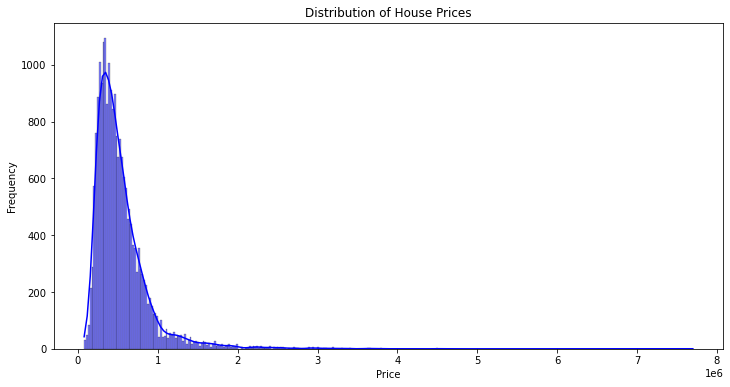

In [58]:
# Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(dataset['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This histogram represents the frequency of houses at different price points. The plot also includes a Kernel Density Estimate (KDE), which is the smooth curve showing the distribution shape.

Central Tendency: The peak of the KDE suggests where the bulk of house prices are concentrated. A peak in a lower price range might suggest affordability is more common.

Spread: The width of the distribution indicates variability in house prices. A wider spread means prices are highly variable, impacting buyer's options.

Skewness: If the tail of the histogram extends further to the right, it indicates a right-skewed distribution, meaning there are a few very expensive houses.

Outliers: Extreme values on the higher end can be seen as separate, sparse bars, indicating potential outliers.


-Log transformation is required to normalize our target variable which is price.



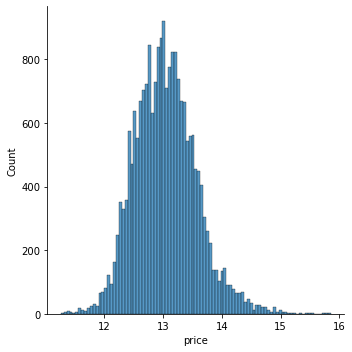

In [59]:
dataset.price = np.log(dataset.price)
sns.displot(dataset.price);

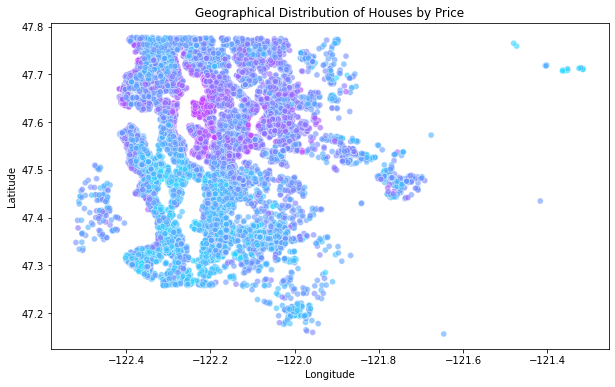

In [60]:
## Geographical Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', data=dataset, hue='price', palette='cool', legend=None, alpha=0.6)
plt.title('Geographical Distribution of Houses by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This scatter plot maps houses based on their longitude and latitude, with color indicating the price.

Location Value: Areas with higher concentration of expensive houses can be identified by clusters of darker colors. This might indicate desirable neighborhoods or areas with higher property values.

Geographic Trends: The spread of colors can also suggest geographic trends in property values, such as coastal properties being more expensive.

Density: More densely plotted areas indicate regions with higher numbers of listings, which could impact local market dynamics.


#### DEALING WITH OUTLIERS

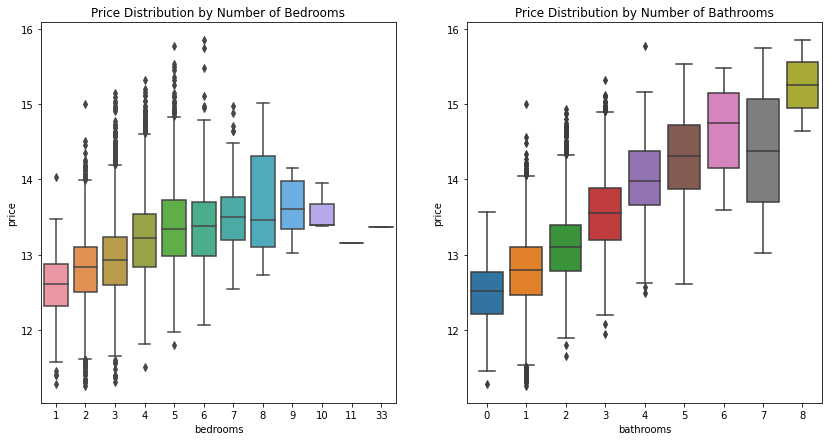

In [61]:
## Relation between Price and Bedrooms/Bathrooms
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='bedrooms', y='price', data= dataset)
plt.title('Price Distribution by Number of Bedrooms')

plt.subplot(1, 2, 2)
sns.boxplot(x='bathrooms', y='price', data=dataset)
plt.title('Price Distribution by Number of Bathrooms')
plt.show()




These boxplots show how house prices vary with the number of bedrooms and bathrooms 

Median Price: The line in the middle of each box indicates the median price for each category, providing a sense of the typical price.

Price Range: The height of the boxes shows the interquartile range (middle 50% of data), which helps understand the typical price variation within each category.

Outliers: Points above or below the whiskers represent outliers, which are significantly higher or lower priced houses than typical for that number of bedrooms or bathrooms.

Trends: Generally, more bedrooms and bathrooms correlate with higher prices, but diminishing returns or price saturation can be observed in higher categories.

Analysis of the data within the normal range is nearly impossible to interpret because of the price outliers. The grey diamonds are indicative of datapoints that deviate by three times the standard deviation in normally distributed data. If following the three sigma rule, this only accounts for .3% of data, which seems negligible but can have disastrous effects on our model. Let’s take those outliers out. We’ll use a combination of scipy’s zscore() and numpy’s abs() methods to identify and remove the outliers in price.

In [62]:

dataset = dataset[(np.abs(stats.zscore(dataset.price)) < 3)]

This will eliminate any influence one extremely high selling price would have on our ability to predict a home’s price from our dataset.

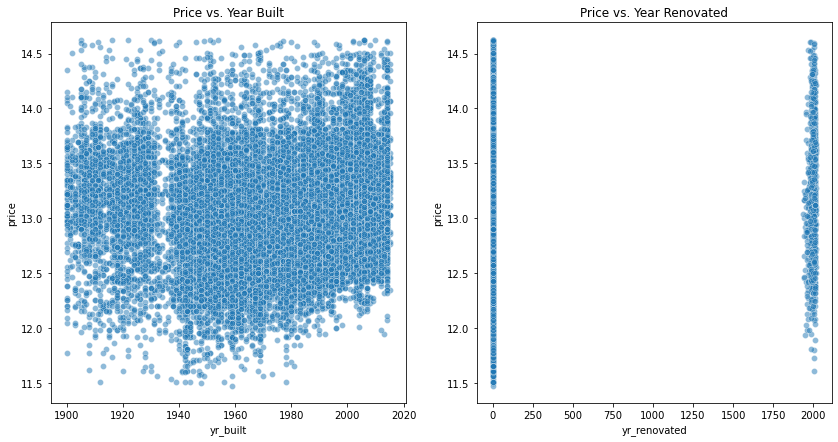

In [63]:
## Year Built and Renovated Impact
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='yr_built', y='price', data=dataset, alpha=0.5)
plt.title('Price vs. Year Built')

plt.subplot(1, 2, 2)
sns.scatterplot(x='yr_renovated', y='price', data=dataset, alpha=0.5)
plt.title('Price vs. Year Renovated')
plt.show()


Scatter plots showing how prices compare with the year the house was built and the year it was renovated.

Trends Over Time: Older houses might not necessarily be cheaper; historical or well-maintained homes can also command high prices.

Renovation Impact: Renovated homes can vary widely in price, suggesting that the quality and extent of renovations, along with the original house's characteristics, significantly impact value.

Age and Price: Newer homes tend to have a more consistent price range, often at a premium due to modern features and less anticipated maintenance.

### ADDING NEW FEATURE FROM EXISTING FEATURES

In [64]:
dummies =pd.get_dummies(dataset[['waterfront', 'view', 'condition']], drop_first=True ,dtype=int)
dummies
new_dataset = pd.concat([dataset , dummies], axis=1)
new_dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,12.309982,3,1,1180,5650,1,NO,NONE,Average,...,5650,0,0,0,0,1,0,0,0,0
6414100192,12/9/2014,13.195614,3,2,2570,7242,2,NO,NONE,Average,...,7639,0,0,0,0,1,0,0,0,0
5631500400,2/25/2015,12.100712,2,1,770,10000,1,NO,NONE,Average,...,8062,0,0,0,0,1,0,0,0,0
2487200875,12/9/2014,13.311329,4,3,1960,5000,1,NO,NONE,Very Good,...,5000,0,0,0,0,1,0,0,0,1
1954400510,2/18/2015,13.142166,3,2,1680,8080,1,NO,NONE,Average,...,7503,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,12.793859,3,2,1530,1131,3,NO,NONE,Average,...,1509,0,0,0,0,1,0,0,0,0
6600060120,2/23/2015,12.899220,4,2,2310,5813,2,NO,NONE,Average,...,7200,0,0,0,0,1,0,0,0,0
1523300141,6/23/2014,12.904459,2,0,1020,1350,2,NO,NONE,Average,...,2007,0,0,0,0,1,0,0,0,0


In [65]:
new_dataset["rate"] = new_dataset["grade"].str.split().apply(lambda x: x[0])

new_dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,rate
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,12.309982,3,1,1180,5650,1,NO,NONE,Average,...,0,0,0,0,1,0,0,0,0,7
6414100192,12/9/2014,13.195614,3,2,2570,7242,2,NO,NONE,Average,...,0,0,0,0,1,0,0,0,0,7
5631500400,2/25/2015,12.100712,2,1,770,10000,1,NO,NONE,Average,...,0,0,0,0,1,0,0,0,0,6
2487200875,12/9/2014,13.311329,4,3,1960,5000,1,NO,NONE,Very Good,...,0,0,0,0,1,0,0,0,1,7
1954400510,2/18/2015,13.142166,3,2,1680,8080,1,NO,NONE,Average,...,0,0,0,0,1,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,12.793859,3,2,1530,1131,3,NO,NONE,Average,...,0,0,0,0,1,0,0,0,0,8
6600060120,2/23/2015,12.899220,4,2,2310,5813,2,NO,NONE,Average,...,0,0,0,0,1,0,0,0,0,8
1523300141,6/23/2014,12.904459,2,0,1020,1350,2,NO,NONE,Average,...,0,0,0,0,1,0,0,0,0,7


In [66]:
# #adding the age column

new_dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year, month, and day as separate features
# new_dataset['year'] = new_dataset['date'].dt.year
# new_dataset['month'] = new_dataset['date'].dt.month
# new_dataset['day'] = new_dataset['date'].dt.day



new_dataset['age'] = abs(new_dataset['yr_built'] - new_dataset['date'].dt.year)
final_dataset=new_dataset.drop(['waterfront','view','condition'], axis=1,inplace = True)

final_dataset






# 3. VISUAL EXPLORATIONS INTO MULTICOLLINEARITY


Multicollinearity will have an adverse effect on our model, so columns with too high of a correlation should be removed. There are two simple methods that can be used: the Seaborn library’s correlation heatmap and Pandas’ .corr() method.

By dropping the ‘price’ column from our dataframe, we can define and investigate our features.

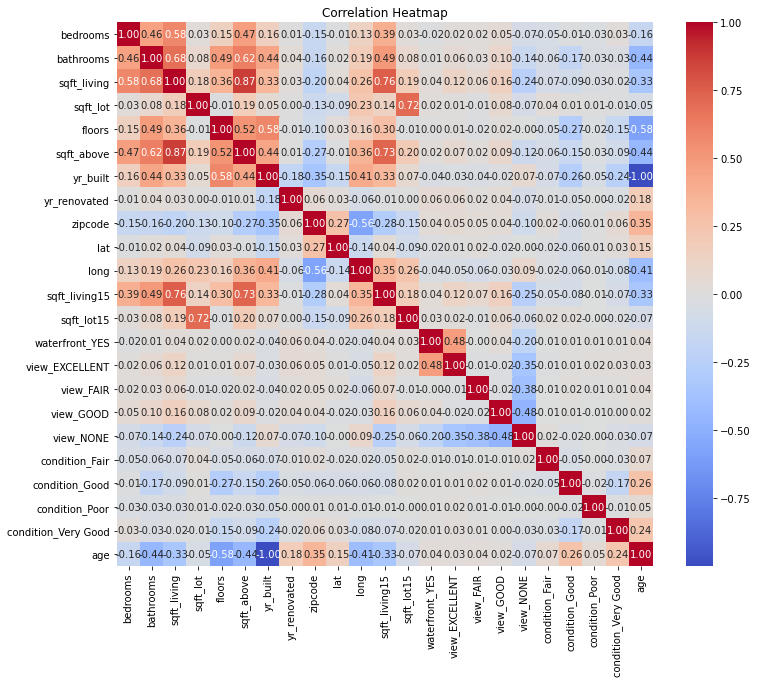

In [67]:
# Heatmap of Feature Correlation
features = new_dataset.drop('price', axis=1)


plt.figure(figsize=(12, 10))

sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



A heatmap showing the correlation coefficients between different features in the dataset.

Strong Correlations: High positive values (closer to +1.0) indicate a strong positive relationship between features, useful for predicting one from another.

Negative Correlations: Values closer to -1.0 show a strong inverse relationship.

Multicollinearity Concerns: Features that are highly correlated with others  may lead to multicollinearity in regression models, potentially necessitating removal or combining of features.

In [68]:
abs(features.corr()) > 0.85

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,...,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,age
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
yr_renovated,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Pandas’ correlation matrix can help identify features that have a correlation higher than a defined threshold. In this case, we used 85% as a threshold. Sqft_above and sqft_living are too highly correlated, so one must be removed.

### MULTIVARIATE ANALYSIS

#### Checking linearity

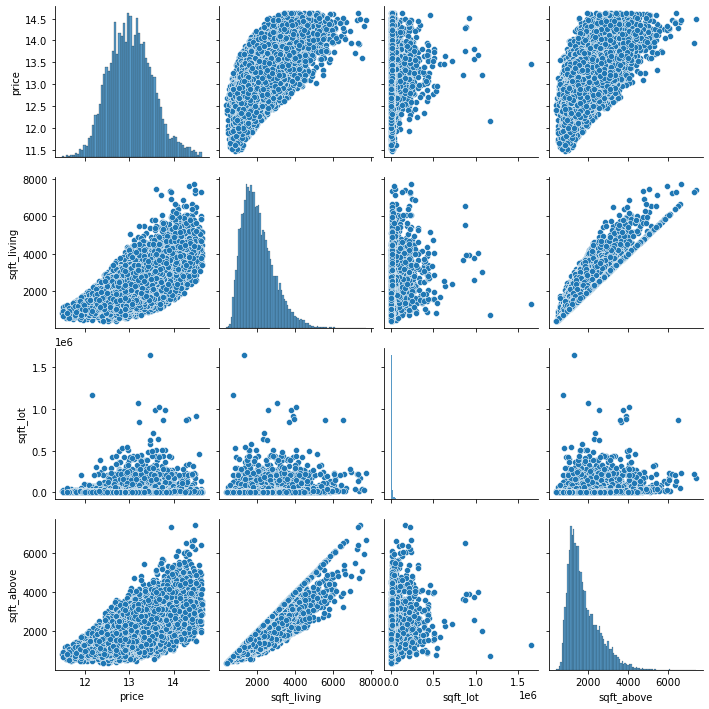

In [69]:
sns.pairplot(dataset.loc[:,['price','sqft_living','sqft_lot','sqft_above','sqft_basement']]);

##### CHECKING CORRELATION BETWEEN ATTRIBUTES

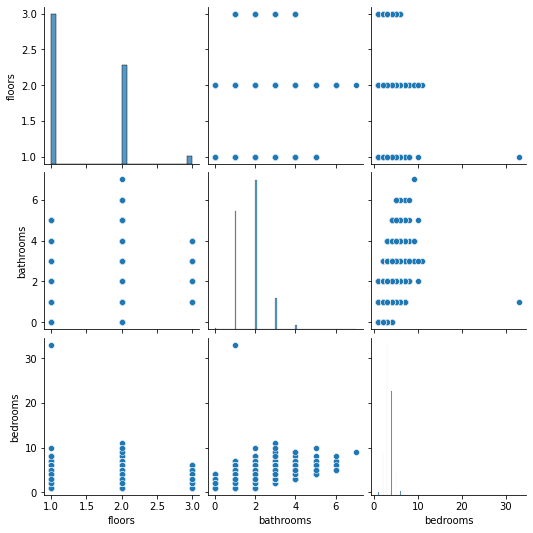

In [70]:
sns.pairplot(dataset.loc[:,['floors','bathrooms','bedrooms','grade','waterfront','view']]); #to find the correlation between attributes

#### JOINT PLOTS

The joint plots neatly package KDEs, histograms, scatter plots and regression lines, all in one line of code!

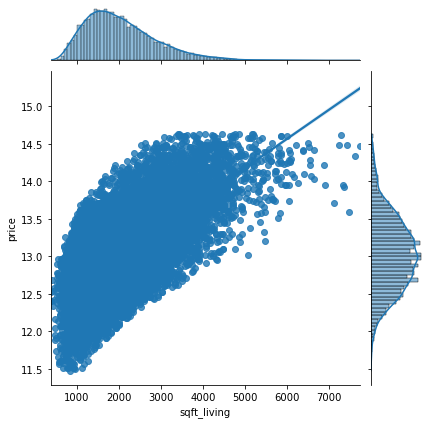

In [71]:
sns.jointplot(x="sqft_living", y="price", data=new_dataset, kind="reg")

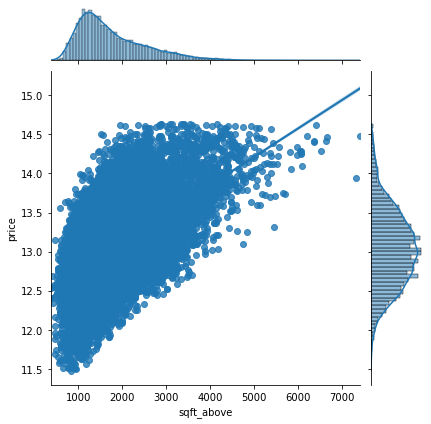

In [72]:
sns.jointplot(x="sqft_above", y= 'price',data=dataset, kind='reg')

The top histograms are respective to the x values and the ones on the right are respective to the y values. we can see the linear relationship between x and y with the scatter and regression line!

Dropping sqft_above eliminates the multicollinearity problem and potentially improves the stability and interpretability of our regression model.

In [73]:
working_dataset = new_dataset.drop(columns='sqft_above', axis = 1)
working_dataset=working_dataset.drop(columns='date',axis=1)
working_dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,yr_renovated,...,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,rate,age
id,,,,,,,,,,,,,,,,,,,,,
7129300520,12.309982,3,1,1180,5650,1,7 Average,0.0,1955,0.0,...,0,0,0,1,0,0,0,0,7,59
6414100192,13.195614,3,2,2570,7242,2,7 Average,400.0,1951,1991.0,...,0,0,0,1,0,0,0,0,7,63
5631500400,12.100712,2,1,770,10000,1,6 Low Average,0.0,1933,0.0,...,0,0,0,1,0,0,0,0,6,82
2487200875,13.311329,4,3,1960,5000,1,7 Average,910.0,1965,0.0,...,0,0,0,1,0,0,0,1,7,49
1954400510,13.142166,3,2,1680,8080,1,8 Good,0.0,1987,0.0,...,0,0,0,1,0,0,0,0,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,12.793859,3,2,1530,1131,3,8 Good,0.0,2009,0.0,...,0,0,0,1,0,0,0,0,8,5
6600060120,12.899220,4,2,2310,5813,2,8 Good,0.0,2014,0.0,...,0,0,0,1,0,0,0,0,8,1
1523300141,12.904459,2,0,1020,1350,2,7 Average,0.0,2009,0.0,...,0,0,0,1,0,0,0,0,7,5


The 'floors', and 'bedrooms' variables do not have a clear linear relationship with house price. Sqft living has a stronger linear relationship with price

## SIMPLE LINEAR REGRESSION BASELINE MODELS

### Impact of living space on the price of property

While the ultimate goal of this project is to develop a multiple regression model for predicting price, we'll select final features by starting with feature-wise simple linear regression.

There are 3 assumptions about the data that must be checked before building any simple linear regression model:

There should be a linear relationship between the explanatory and response variables (already checked).
The data should be homoscedastic (i.e., the residuals have equal variance around the regression line on a scatterplot).
The model residuals should follow a normal distribution (i.e. the residuals fall along a relatively straight line on a QQ plot).
All of the above assumptions, in addition to the assumption of no multicollinearity, also apply to multiple regression.

In addition to checking for these assumptions, we will also look at two values in the model summary:

R-squared: This value tells us what proportion of the variability of y around its mean can be explained by the model. It can fall between 0 and 1, and a higher r-squared value indicates higher predictive power.
p-value: The null hypothesis for linear regression is that there is no relationship between the chosen explanatory variables and the response variable. Therefore, we want the model to have a p-value lower than .05 so we can reject the null hypothesis.
A simple linear regression model includes only one explanatory variable and one response variable. We'll create a simple linear regression model for each of the chosen explanatory variables that satisfy linearity, and test the assumptions for each. These variables are sqft_living, sqft_living15, bathrooms and grade.

In [74]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

In [75]:
price = working_dataset['price']
bath = working_dataset['bathrooms']
bed = working_dataset['bedrooms']
grade = working_dataset['rate']
sqft_living15 =working_dataset['sqft_living15']
floors = working_dataset['floors']
age = working_dataset['age']
sqft_living = working_dataset['sqft_living']

In [76]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=working_dataset).fit()
print(sqft_living_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        15:41:30   Log-Likelihood:                -9245.0
No. Observations:               21428   AIC:                         1.849e+04
Df Residuals:                   21426   BIC:                         1.851e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2369      0.007   1871.213      

### Interpretation


R-squared and Adjusted R-squared:

The R-squared value measures the proportion of the variance in the dependent variable (house prices) that is explained by the independent variable (square footage of living space) in the model. In this case, the R-squared value is 0.442, indicating that approximately 44.2% of the variance in house prices can be explained by the square footage of living space.
Coefficients:

The coefficient for sqft_living is 206.0861, indicating that for each additional square foot increase in living space, the price of the house increases by $206.09, holding other variables constant.
Statistical Significance:
Both the constant term and the coefficient for sqft_living have statistically significant p-values (p < 0.05), indicating that they are significantly associated with house prices.
F-statistic:

The F-statistic tests the overall significance of the model. In this case, the F-statistic is 1.676e+04, with a p-value close to zero, indicating that the model is statistically significant at a very high level of confidence.
Overall, the model suggests that the square footage of living space is a significant predictor of house prices, with a positive relationship between these two variables. However, it's important to note that this model explains only a portion of the variance in house prices, and other factors not included in the model may also influence house prices.

### Impact of the number of bathrooms on price of the property

In [77]:

y_slr2 = working_dataset["price"]
X_slr2 = working_dataset[['bathrooms']]

X_slr2 = sm.add_constant(X_slr2)

slr_model2 = sm.OLS(y_slr2, X_slr2).fit()

summary = slr_model2.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     6501.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        15:41:30   Log-Likelihood:                -12845.
No. Observations:               21428   AIC:                         2.569e+04
Df Residuals:                   21426   BIC:                         2.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4459      0.008   1569.532      0.0

### Interpretation


R-squared and Adjusted R-squared:

The R-squared value measures the proportion of the variance in the dependent variable (house prices) that is explained by the independent variable (number of bathrooms) in the model. In this case, the R-squared value is 0.213, indicating that approximately 21.3% of the variance in house prices can be explained by the number of bathrooms.
Coefficients:

The coefficient for bathrooms is 171,600, indicating that, on average, each additional bathroom is associated with an increase in house price of $171,600, holding other variables constant.
Statistical Significance:

Both the constant term and the coefficient for bathrooms have statistically significant p-values (p < 0.05), indicating that they are significantly associated with house prices.
F-statistic:

The F-statistic tests the overall significance of the model. In this case, the F-statistic is 5737, with a p-value close to zero, indicating that the model is statistically significant at a very high level of confidence.
Overall, the model suggests that the number of bathrooms is a significant predictor of house prices, with a positive relationship between these two variables. However, it's important to note that this model explains only a portion of the variance in house prices, and other factors not included in the model may also influence house prices.

# Splitting of Data for training and testing

In [78]:
X = working_dataset.drop(columns='price',axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,yr_renovated,zipcode,...,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,rate,age
id,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1,1180,5650,1,7 Average,0.0,1955,0.0,98178,...,0,0,0,1,0,0,0,0,7,59
6414100192,3,2,2570,7242,2,7 Average,400.0,1951,1991.0,98125,...,0,0,0,1,0,0,0,0,7,63
5631500400,2,1,770,10000,1,6 Low Average,0.0,1933,0.0,98028,...,0,0,0,1,0,0,0,0,6,82
2487200875,4,3,1960,5000,1,7 Average,910.0,1965,0.0,98136,...,0,0,0,1,0,0,0,1,7,49
1954400510,3,2,1680,8080,1,8 Good,0.0,1987,0.0,98074,...,0,0,0,1,0,0,0,0,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2,1530,1131,3,8 Good,0.0,2009,0.0,98103,...,0,0,0,1,0,0,0,0,8,5
6600060120,4,2,2310,5813,2,8 Good,0.0,2014,0.0,98146,...,0,0,0,1,0,0,0,0,8,1
1523300141,2,0,1020,1350,2,7 Average,0.0,2009,0.0,98144,...,0,0,0,1,0,0,0,0,7,5


In [79]:
y= working_dataset['price']
y

id
7129300520    12.309982
6414100192    13.195614
5631500400    12.100712
2487200875    13.311329
1954400510    13.142166
                ...    
263000018     12.793859
6600060120    12.899220
1523300141    12.904459
291310100     12.899220
1523300157    12.691580
Name: price, Length: 21428, dtype: float64

In [80]:
X_train, X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [81]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,yr_renovated,zipcode,...,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,rate,age
id,,,,,,,,,,,,,,,,,,,,,
225039145,3,1,1210,4731,1,7 Average,0.0,1901,0.0,98117,...,0,0,0,1,0,0,0,0,7,113
1015000050,4,2,2220,5900,2,8 Good,0.0,2014,0.0,98117,...,0,0,0,1,0,0,0,0,8,1
8091411120,3,2,1400,7205,1,7 Average,260.0,1985,0.0,98030,...,0,0,0,1,0,0,0,0,7,29
7149400450,4,2,1980,7081,1,7 Average,510.0,1977,0.0,98032,...,0,0,0,1,0,0,0,0,7,38
3365900520,3,1,1080,8580,1,6 Low Average,0.0,1900,0.0,98168,...,0,0,0,1,0,0,0,0,6,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6744701310,4,2,3830,11972,1,11 Excellent,1460.0,1981,0.0,98155,...,1,0,0,0,0,0,0,0,11,34
4045500620,3,3,3410,25741,2,8 Good,0.0,1993,0.0,98014,...,0,0,0,1,0,1,0,0,8,21
2122039137,3,2,1656,108900,1,7 Average,0.0,1985,0.0,98070,...,0,0,0,1,0,1,0,0,7,30


In [82]:
Y_train

id
225039145     12.560244
1015000050    13.388720
8091411120    12.301383
7149400450    12.567237
3365900520    12.167851
                ...    
6744701310    14.430696
4045500620    13.487006
2122039137    13.044402
5500100120    12.847927
2028700360    13.370785
Name: price, Length: 14999, dtype: float64

In [83]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,yr_renovated,zipcode,...,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,rate,age
id,,,,,,,,,,,,,,,,,,,,,
3592500800,5,3,3680,6060,2,9 Better,1050.0,1925,0.0,98112,...,0,0,0,1,0,0,0,1,9,89
3630240140,4,3,2110,1286,2,9 Better,400.0,2007,0.0,98029,...,0,0,0,1,0,0,0,0,9,8
3472800068,5,2,2900,9799,1,8 Good,1450.0,1959,0.0,98004,...,0,0,0,1,0,0,0,0,8,55
1026069061,4,2,3600,203425,2,9 Better,200.0,1979,0.0,98077,...,0,0,0,1,0,0,0,0,9,36
731500200,4,2,2156,3562,2,9 Better,0.0,2012,0.0,98030,...,0,0,0,1,0,0,0,0,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126059048,3,1,1250,9427,1,6 Low Average,0.0,1931,0.0,98034,...,0,0,0,1,0,0,0,0,6,84
5152800030,4,2,2910,16362,1,9 Better,790.0,1969,0.0,98003,...,0,0,0,0,0,1,0,0,9,46
6678900150,4,2,2240,8664,1,8 Good,770.0,1975,0.0,98033,...,0,0,0,1,0,0,0,1,8,39


In [84]:
Y_test

id
3592500800    14.430696
3630240140    13.279367
3472800068    13.782987
1026069061    13.432785
731500200     12.758520
                ...    
2126059048    12.591335
5152800030    13.091904
6678900150    13.579788
1823049202    12.072541
2867700035    13.122363
Name: price, Length: 6429, dtype: float64

In [85]:
def linearreg(features):
    X = working_dataset[features]
    y = working_dataset['price']

    #X=stm.add_constant(X)

    #X = np.square(X)

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

    # Create a Linear regressor
    lm = LinearRegression()

    # Train the model using the training sets 
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    # Model Evaluation
    print('R^2:',metrics.r2_score(y_test, y_pred))
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
    print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:',metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('MAPE',mape(y_test,y_pred))
    scores = cross_val_score(lm,X_train, y_train, cv=10) #applying K fold validation of CV - 10
    print("cross validation score", np.mean(scores)) 

In [86]:

def mape (y_test,y_pred): #to calculate mean absolute percentage error
    y_test,y_pred = np.array(y_test),np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100

### MULTIPLE LINEAR REGRESSION MODELS

#### MODEL 1

### Impact of square footage of living space, bathrooms, bedrooms and floors on property value

In [87]:
#fitting the linear regression model by taking the attributes above
features= ['floors','bathrooms','bedrooms','sqft_living']
model_1=linearreg(features)

R^2: 0.47113024725185837
Adjusted R^2: 0.4708009385639703
MAE: 0.2991755951965382
MSE: 0.1364135676042089
RMSE: 0.3693420739696588
MAPE 2.2991145924269976
cross validation score 0.45399427869109665


### MODEL 2

### Impace of grade ratings,sqft_living on property value

In [88]:
#selecting few attributes in combination to fit our model
features = ['sqft_living','rate']
model_2=linearreg(features)

R^2: 0.5372286301636464
Adjusted R^2: 0.5370845992362152
MAE: 0.27883032323849033
MSE: 0.119364537707882
RMSE: 0.3454917331976005
MAPE 2.1438140689204292
cross validation score 0.519779004849388


#### MODEL 3

### Impact of floors,bathrooms,bedrooms,rate,sqft_living and age

In [89]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good', 'rate',
       'age'],
      dtype='object')

In [90]:
#fitting the linear regression model by taking all the attributes
features= ['floors','bathrooms','bedrooms','rate','age','sqft_living']
model_3=linearreg(features)

R^2: 0.6104351923725021
Adjusted R^2: 0.6100712264980448
MAE: 0.2521915370831161
MSE: 0.10048206566054377
RMSE: 0.316989062367369
MAPE 1.9404165991632798
cross validation score 0.5999939741727108


### MODEL 4

### Impact of conditions,view,lat and long,sqft_living,bedrooms,bathrooms and floors

In [91]:
#fitting the linear regression model by taking the attributes above
features= ['lat','long','view_FAIR','view_GOOD','view_NONE','view_EXCELLENT','condition_Fair','condition_Good',
'condition_Poor','condition_Very Good','sqft_living','bathrooms','bedrooms','floors'
]
model_4 = linearreg(features)

R^2: 0.6842216567037567
Adjusted R^2: 0.6835323993283049
MAE: 0.22100190868161157
MSE: 0.08145001705495727
RMSE: 0.28539449373622694
MAPE 1.6909988010250971
cross validation score 0.6743903939586859


### MODEL 5

### Impact of  sqft_living',waterfront,view grade and age


In [92]:
model_5 = linearreg(['sqft_living','waterfront_YES','view_FAIR','view_GOOD',
'view_NONE','view_EXCELLENT','rate','age'])

R^2: 0.6110371336582102
Adjusted R^2: 0.6105524447281894
MAE: 0.2530543925078247
MSE: 0.1003268044495461
RMSE: 0.31674406774168024
MAPE 1.9482304214409834
cross validation score 0.5998898103656158


Question :


 What combination of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?
 
Model 4: conditions,view,lat and long,sqft_living,bedrooms,bathrooms and floors
are the best fit for a multiple regression model. These features are highly correlated with price, have relatively low multicollinearity, and can together account for more than half of the variability of price. All multiple regression assumptions are satisfied with these features included.Also the model is valid as the cross validation score is not low.



### Conclusions

After conducting a comprehensive analysis of the housing market in King County, the following conclusions can be drawn:

1. **Key Predictors of House Prices**: Through our analysis, we have identified several key predictors that significantly impact house prices in King County. These predictors include:
   - Condition of the property
   - View from the property
   - Latitude and longitude coordinates
   - Square footage of living space
   - Number of bedrooms
   - Number of bathrooms
   - Number of floors

2. **Impact of Predictors**: Our analysis reveals that these predictors have a substantial influence on house prices. Properties with better conditions, desirable views, larger living spaces, and more bedrooms and bathrooms tend to command higher prices in the market. Additionally, factors such as location (latitude and longitude) and the number of floors also play significant roles in determining property prices.

3. **Model Performance**: We developed predictive models to estimate house prices based on these predictors. 
The model does have some limitations: given that some of the variables needed to be log-transformed to satisfy regression assumptions, any new data used with the model would have to undergo similar preprocessing. Additionally, given regional differences in housing prices, the model's applicability to data from other counties may be limited. Given that outliers were removed, the model may also not accurately predict extreme values.

## Recommendations for the real estate agency

1. **Feature Enhancement**: Encourage sellers to focus on improving key features of their properties that have been identified as significant predictors of house prices. This includes enhancing the condition of the property, maximizing views, and optimizing living space layout.

2. **Property Marketing**: Highlight the key features identified in your analysis when marketing properties to potential buyers. Emphasize the condition, views, square footage, and other desirable attributes to attract interest and justify pricing.

3. **Price Guidance**: Provide sellers with data-driven insights into the factors influencing house prices in King County. Use your predictive models to offer guidance on pricing strategies based on the specific features and characteristics of each property.

4. **Buyer Guidance**: Assist buyers in identifying properties that align with their preferences and budget constraints. Educate them about the importance of key predictors in determining property value and help them make informed decisions during the home-buying process.

5. **Market Analysis**: Continuously monitor market trends and dynamics in King County. Stay updated on changes in buyer preferences, supply and demand dynamics, and other factors that may impact property prices. Use this information to adapt pricing strategies and marketing approaches accordingly.

6. **Data Integration**: Integrate your predictive models into the agency's operations to streamline pricing and decision-making processes. Develop tools or software solutions that leverage your models to provide real-time pricing estimates for properties listed by the agency.

7. **Client Education**: Educate clients about the insights and findings from your analysis. Offer workshops, webinars, or informational materials that explain the factors influencing property prices and how clients can leverage this knowledge to their advantage.

8. **Feedback Loop**: Establish a feedback loop with clients to gather insights and input on their experiences with pricing strategies and property evaluations. Use this feedback to refine and improve your predictive models and services over time.

By implementing these recommendations, the real estate agency can leverage data-driven insights to enhance their pricing models, improve client satisfaction, and ultimately achieve better outcomes for both sellers and buyers in the King County housing market.